# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Семинар 10. Statistics in Data Analysis


## Раздел 1. Теория по математической статистике

Прежде чем переходить к практическим приложениям математической статистики на конкретных примерах в анализе данных, давайте для начала вспомним и повторим некоторые ключевые теоретические аспекты.

### Статистические гипотезы

В процессе работы исследователю часто приходится отвечать на вопросы типа:
1. Можно ли утверждать, что новый баннер увеличивает CTR (click-through rate)?
2. Действительно ли разаботанное лекарство ускоряет процесс выздоравления пациентов?
3. Правда ли, что средняя продолжительность жизни в двух конкретных странах разная?
4. И множество других

Для того чтобы ответить на эти вопросы, необходимо сформулировать статистические гипотезы. Формулирование гипотез систематизирует предположения исследователя и представляет их в четком и лаконичном виде.



Статистические гипотезы разделяют на **нулевые** и **альтернативные**:
1. **Нулевая гипотеза $H_0$** — это гипотеза об отсутствии различий. Нулевая гипотеза — это то, что мы хотим опровергнуть, если перед нами стоит задача доказать значимость различий.
2. **Альтернативная гипотеза $H_1$** — это гипотеза о значимости различий, то, что мы хотим доказать.


Например, для третьего вопроса из примера выше гипотезы можно сформулировать следующим образом:
1. **Нулевая гипотеза $H_0$**: средние продолжительности жизни в этих странах **равны**.
2. **Альтернативная гипотеза $H_1$**: средние продолжительности жизни в этих странах **не равны**.

#### Вопрос

Чем статистические гипотезы отличаются от нестатистических гипотез?

#### Теоретическое задание

Сформулируйте нулевую и альтернативную гипотезы для первого и второго вопроса из примера выше.

### Статистический критерий

Статистический критерий — это решающее правило, обеспечивающее надежное поведение, то есть принятие истинной и отклонение ложной гипотезы с высокой вероятностью. Статистические критерии обозначают также метод расчета определенного числа (статистики) и само это число.

Говоря более простым языком, именно с помощью соответствующего (верно подобранного) статистического критерия можно проверить статистическую гипотезу.

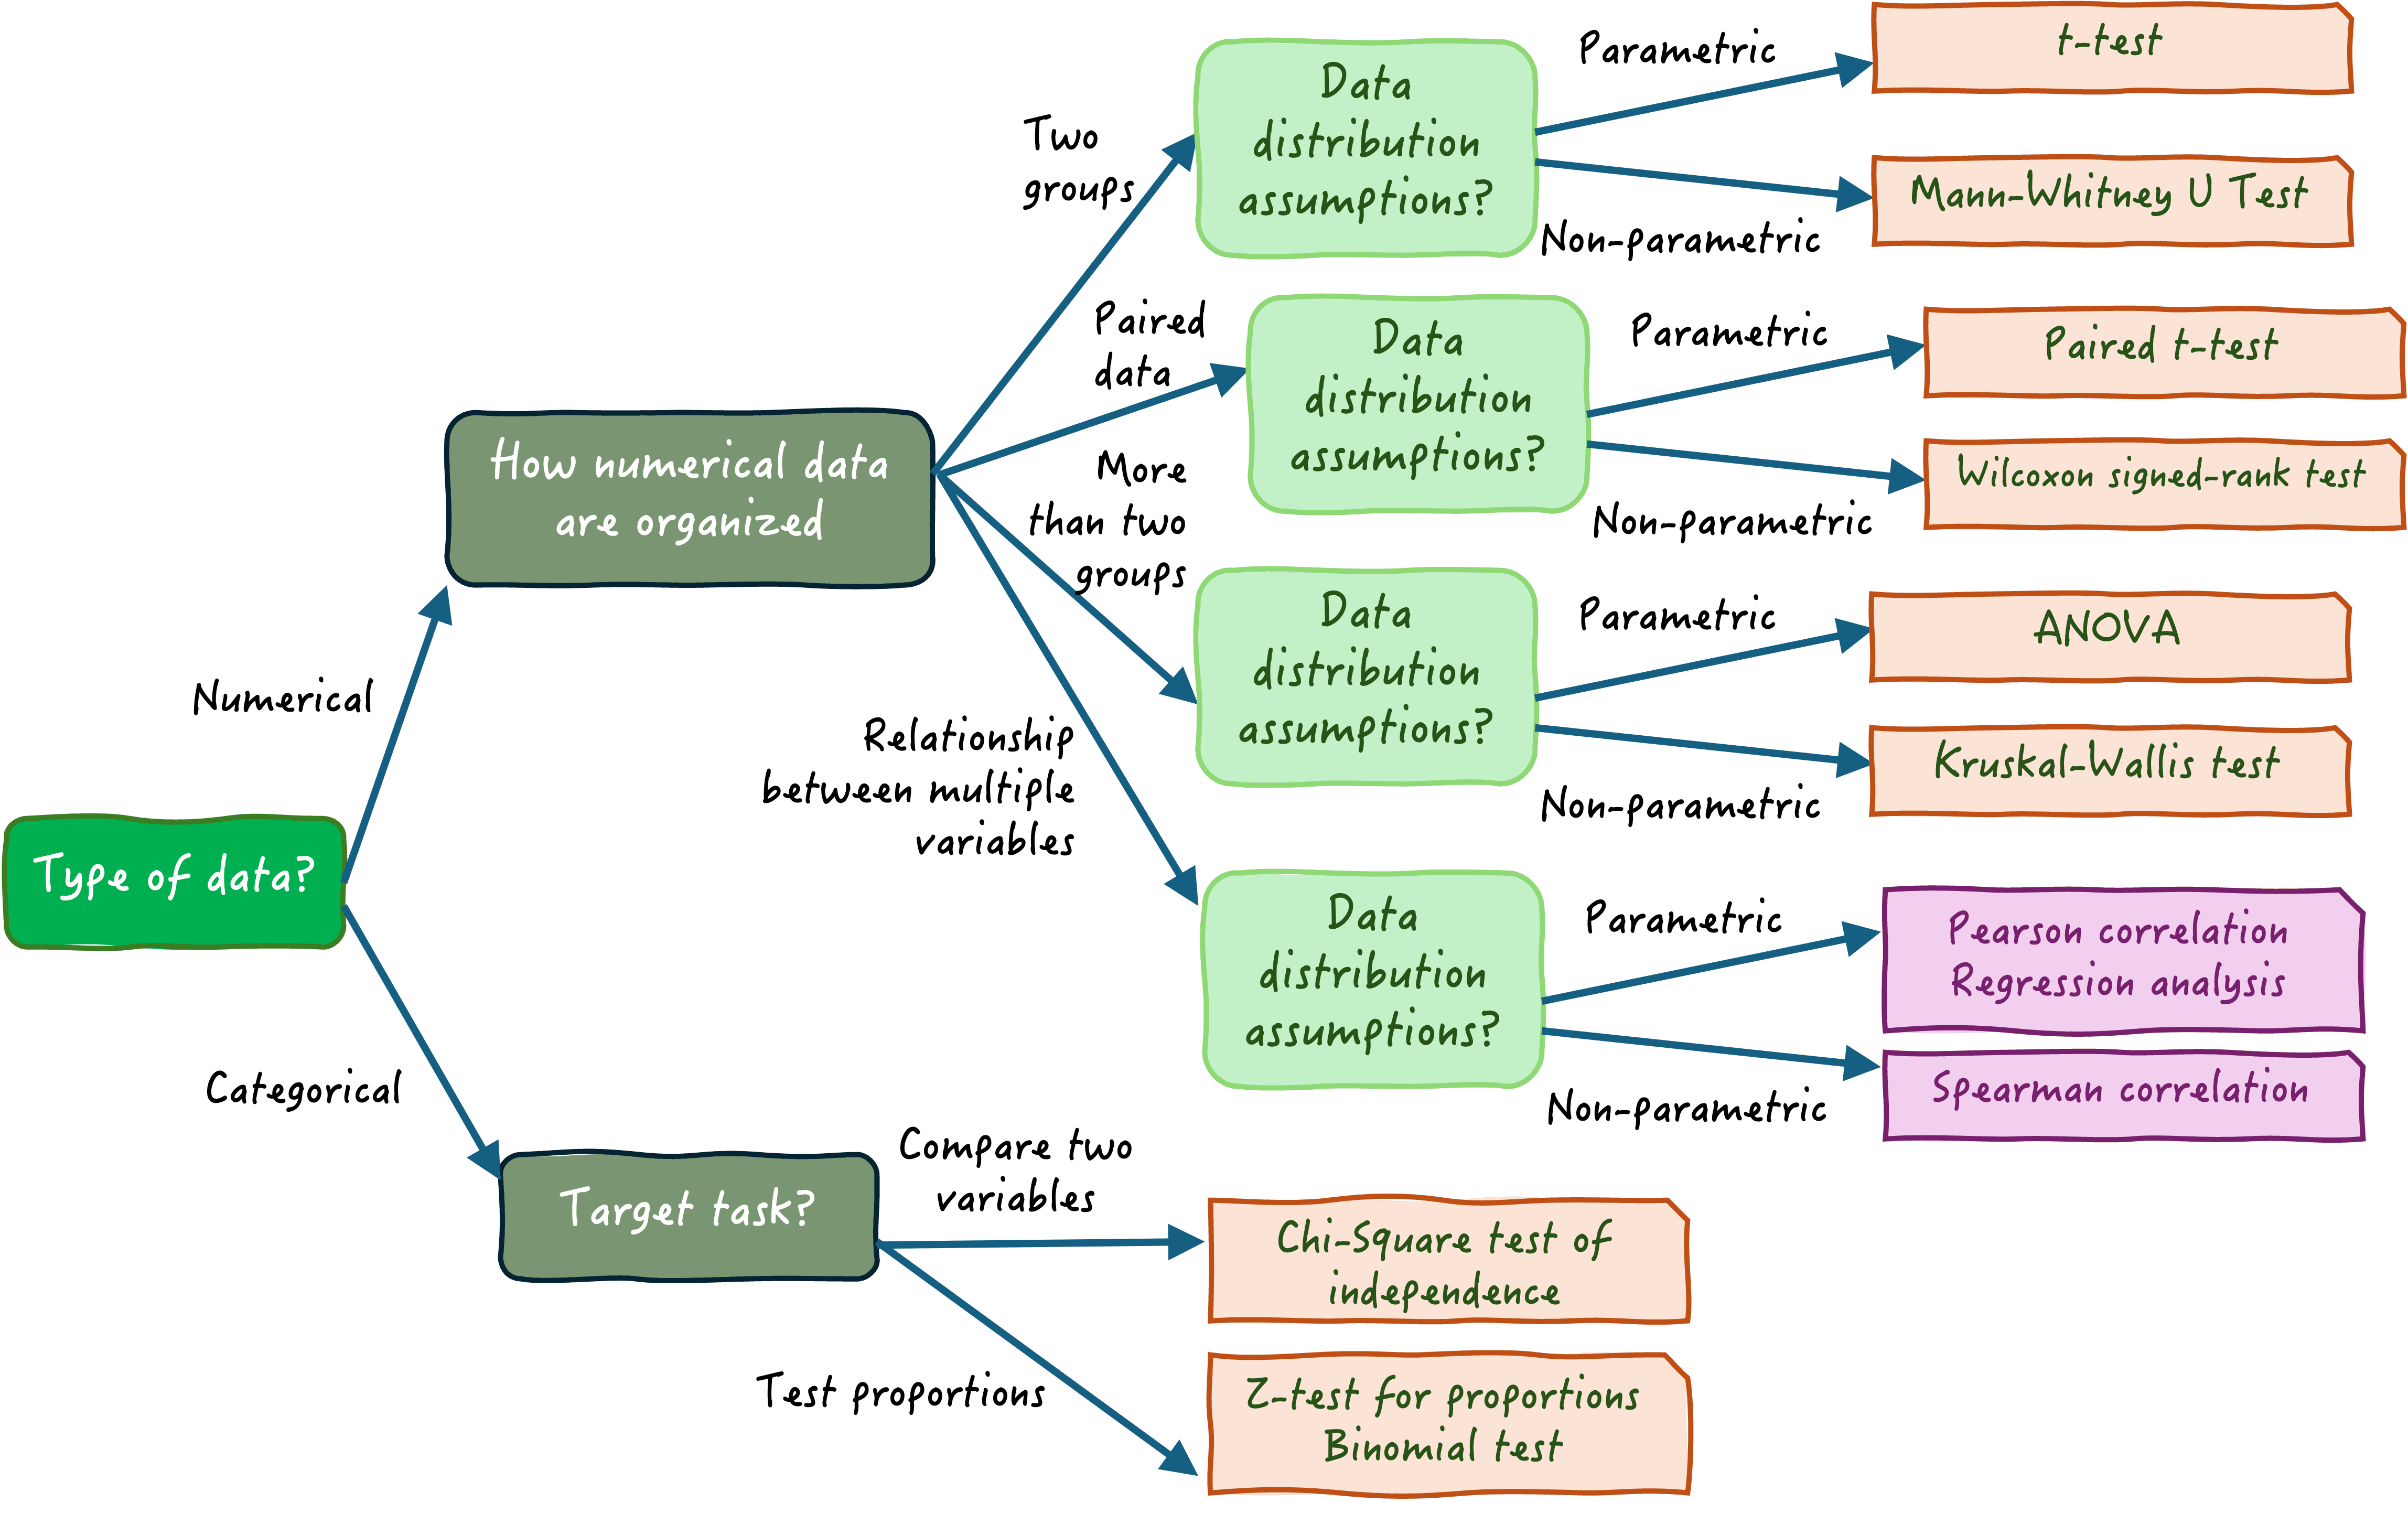

### Уровень статистической значимости (p-value)

Уровень значимости — это вероятность того, что мы сочли различия существенными, а они на самом деле случайны.
Когда мы указываем, что различия достоверны на $5\%$-ом уровне значимости, или при $р<0,05$, то мы имеем виду, что вероятность того,
что они все-таки недостоверны, составляет $0,05$.

Если перевести все это на более формализованный язык, то уровень значимости — это вероятность отклонения нулевой гипотезы, в то время как она верна.

Нулевую гипотезу отклоняют (обычно), если достигнутый уровень значимости $р<0,05$. Но, конечно, не обязательно порог именно такой.

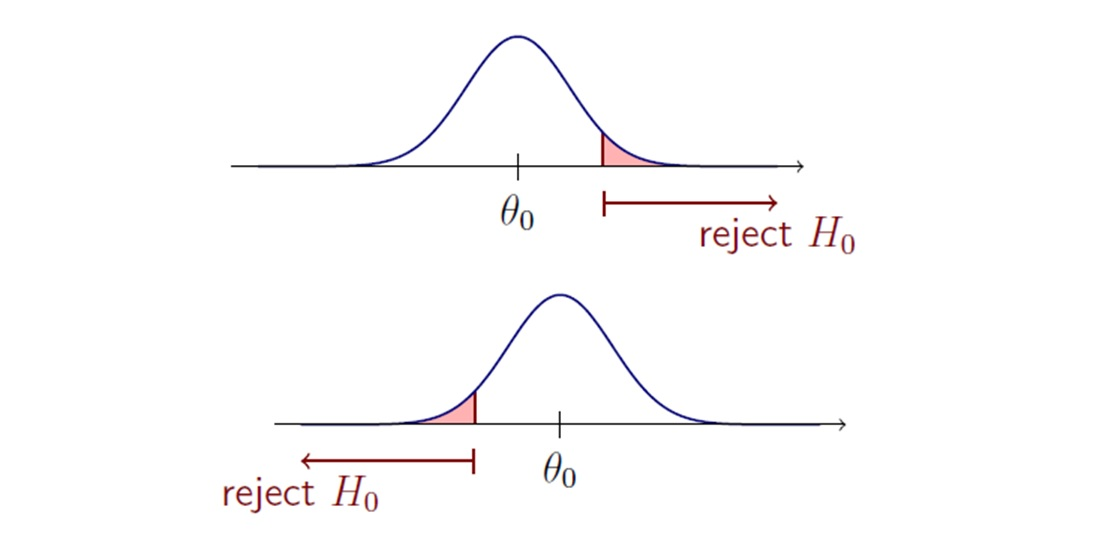

### Ошибки первого и второго рода

- **Ошибкой I рода** называется ошибка, состоящая в том, что мы **отклонили** нулевую гипотезу, в то время как она верна.
- **Ошибкой II рода** называется ошибка, состоящая в том, что мы **приняли** нулевую гипотезу, в то время как она неверна.

Вам может помочь разобраться и вспомнить, как работают ошибки первого и второго рода, следующая картинка:

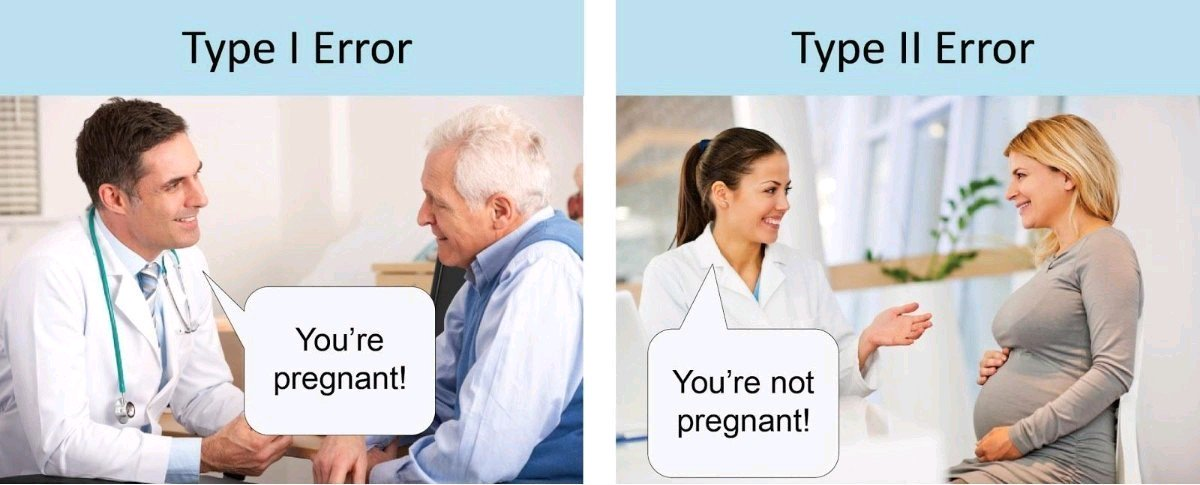

Что в этом примере выступает в качестве нулевой гипотезы?

#### Вопрос

В чем заключается смысл выделения ошибок первого и второго рода отдельно?

### Мощность критерия

Мощность критерия — это способность статистического критерия выявлять различия, если они есть. Иными словами — это его способность отклонить нулевую гипотезу об отсутствии различий, если она неверна.

Вероятность ошибки II рода обозначается как $\beta$.

Мощность критерия — это способность критерия не допустить ошибку II рода, поэтому:

   - Мощность $ = 1 - \beta$.

Мощность критерия определяется эмпирическим путем. Одни и те же задачи могут быть решены с помощью разных критериев, при этом обнаруживается, что некоторые критерии позволяют выявить различия там, где другие оказываются неспособными это сделать, или выявляют более высокий уровень значимости различий.

Возникает логичный вопрос: а зачем же тогда использовать менее мощные критерии в принципе?

Всё дело в том, что основанием для выбора критерия может быть не только мощность,
но и другие его характеристики, а именно:
- простота
- более широкий диапазон использования (например, по отношению к данным, определенным по номинативной шкале, или по отношению к
большим $n$)
- применимость по отношению к неравным по объему выборкам
- и многие другие характеристики

## Раздел 2. Гипотезы о сравнении средних и t-тест

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import t, norm

%matplotlib inline

**t-критерий Стьюдента** (или **t-тест**) направлен на оценку различий велечин средних $\bar{X}$ и $\bar{Y}$ двух выборок $X$ и $Y$, которые распределенны по нормальному закону. Критерий может быть использован для сопоставления средних у связных и несвязных выборок, причем выборки могут быть не равны по величине.

t-критерий Стьюдента основан на **распределении Стьюдента** — однопараметрическом непрерывном распредлении, где в качестве параметра выступает **число степеней свободы $n$**. Число степений свободы считается как количество элементов выборки минус 1.

Распределение Стьюдента очень похоже на нормальное распределение, но его график плотности при малом количестве степеней свободы имеет более тяжелые хвосты — случайная величина чаще **сильно** отклоняется от своего среднего значения. При $n\geq30$ практически полностью совпадает с нормальным распределением.

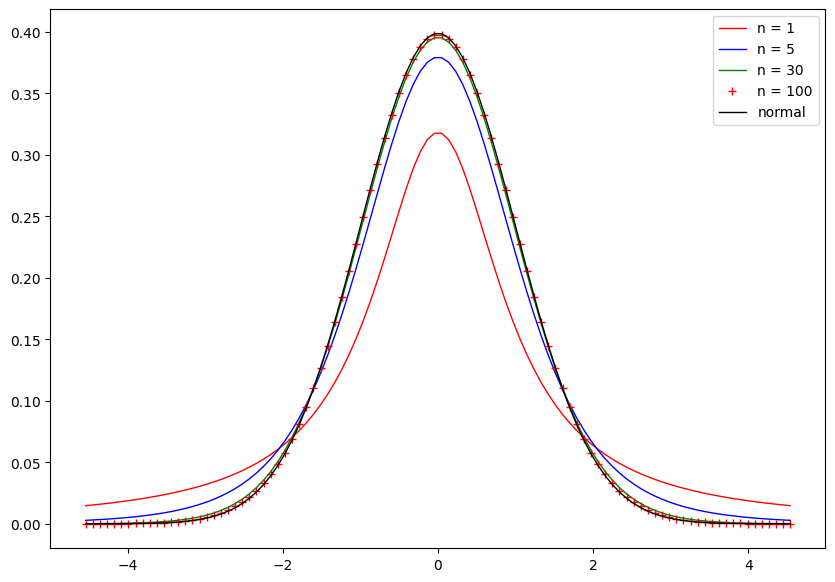

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 1), 'r', lw=1, label='n = 1')
ax.plot(x, t.pdf(x, 5), 'b-', lw=1, label='n = 5')
ax.plot(x, t.pdf(x, 30), 'g-', lw=1, label='n = 30')
ax.plot(x, t.pdf(x, 100), 'r+', lw=1, label='n = 100')
ax.plot(x, norm.pdf(x), 'black', lw=1, label='normal')
ax.legend();

### Случай несвязных выборок

Рассмотрим следующий пример:

Психолог измерял время сложной сенсомотороной реакции выбора (в мс) в контрольной и экспериментальной группах. В экспериментальную группу ($X$) входили 9 спортсменов высокой квалификации. Контрольной группой ($Y$) являлись 8 человек, активно не занимающиеся спортом. Психолог проверяет гипотезу о том, что средняя скорость сложной сенсомоторной реакции выбора у спортсменов выше, чем эта же величина у людей, не занимающихся спортом.

В результате эксперимента получились следующие средние значения:
- Для спортсменов: $\bar{X} = 526$
- Для не занимающихся спортом: $\bar{Y} = 638$

Сырые данные эксперимента приведены ниже.

In [4]:
# Экспериментальная группа
X_1 = [504, 560, 420, 600, 580, 530, 490, 580, 470]
# Контрольная группа
Y_1 = [580, 692, 700, 621, 640, 561, 680, 630]

#### Теоретическое задание

Сформулируйте нулевую и альтернативную гипотезы для этого примера.

Проверим, является ли различие в средних статистически значимым.  Для этого воспользуемся функцией [`ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) для **несвязных** выборок.

In [5]:
ttest_ind(X_1, Y_1)

TtestResult(statistic=-4.12624181242505, pvalue=0.0008972556364194241, df=15.0)

#### Вопрос

Что можно сказать про результаты теста?

#### Теоретическое задание

Допустим, в ходе исследования мы хотели выяснить, влияет ли новый разработанный препарат на скорость выздоравления. Экспериментальная группа получала разработанный препарат, а контрольная — нет. Мы замеряли время выздоравления и применили t-тест к полученным данным. И в итоге получили $p = 0.004$.

Выберете правильные утверждения:

1. Т.к. в нашем исследовании $p$ уровень значимости равен 0,004, то вероятность того, что верна нулевая гипотеза (новый препарат не влияет на скорость выздоровления) также равняется всего-лишь 0,004.
2. Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза, и новый препарат не влияет на скорость выздоровления.
3. Чем меньше $p$ уровень значимости, тем сильнее получаемые различия. Например, если бы $p$ уровень значимости в нашем исследовании был бы равен 0,0001, значит новый препарат еще сильнее бы влиял на скорость выздоровления.
4. Вероятность получить такие (как в эксперименте) или большие различия между среднем временнем выздоравления в экспериментальной и контрольной группе, при условии того, что нулевая гипотеза верна, равна 0.004.

### Случай связных выборок

Рассмотрим следующий пример:

Психолог предположил, что в результате обучения время решения эквивалентных задач (т.е. имеющих один и тот же алгоритм решения) будет значимо уменьшаться. Для проверки гипотезы у восьми испытуемых сравнивалось время решения (в минутах) первой и третьей задач.

В результате эксперимента получились следующие средние значения:
- Для первой задачи: $\bar{X} = 4.6375$
- Для третьей задачи: $\bar{Y} = 3.4875$

Сырые данные приведены ниже.

In [6]:
# Время, потраченое на решение первой задачи
X_2 = [4.0, 3.5, 4.1, 5.5, 4.6, 6.0, 5.1, 4.3]
# Время, потраченое на решение третьей задачи
Y_2 = [3.0, 3.0, 3.8, 2.1, 4.9, 5.3, 3.1, 2.7]

#### Теоретическое задание

Сформулируйте нулевую и альтернативную гипотезы.

#### Вопрос

Что всё-таки означает, что выборки связные и несвязные?

Проверим, являются ли различие в средних статистически значимым.  Для этого воспользуемся функцией [`ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel) для **связных** выборок.

In [7]:
ttest_rel(X_2, Y_2)

TtestResult(statistic=2.7979908224842567, pvalue=0.02660095438966252, df=7)

#### Вопрос

Что можно сказать про результаты теста?

### Требования к данным

Для применения t-критерия Стьюдента данные должны удовлетворять следующим условиям:


- **несвязные выборки**:
    1. Гомогенность дисперсий — дисперсии внутри наших групп должны быть приблизительно одинаковыми
    2. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)
    
    
- **связные выборки**:
    1. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)

### Проверка гомогенности дисперсий

In [8]:
from scipy.stats import levene

Проверить гомогенность дисперсий можно с помощью **критерия Левена**. Проделаем это для примера с несвязными выборками, используя функцию [`levene`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy.stats.levene).

In [9]:
levene(X_1, Y_1)

LeveneResult(statistic=0.34581062836832566, pvalue=0.5652436096974973)

#### Вопрос

Что можно сказать про результаты теста?

### Проверка нормальности распределения

In [10]:
from scipy.stats import shapiro

Проверить распределение на нормальность можно:
- визуально с помощью **графика квантиль-квантиль (Q-Q plot)** или
- с помощью **критерия Шапиро-Уилка**

Давайте сначала проверим наши выборки по критерию Шапиро-Уилка ([`shapiro`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro))

In [11]:
shapiro(X_1)

ShapiroResult(statistic=0.9484576933415627, pvalue=0.6731362941283839)

#### Вопрос

Что можно сказать про результаты теста?

Теперь давайте для начала потренируемся в интерпретации [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) на синтетических данных. Воспользуемся функцией [`qqplot`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html).

<img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Normal_normal_qq.svg" width="400">

In [12]:
from statsmodels.api import qqplot

1. Сгенерируем четыре выборки размером 1000:
    - из нормального распределения
    - из нормального распределения, скошенного впрово [`skewnorm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html),  с коэффициентом ассиметрии равным 2
    - из нормального распруделения, скошенного влево, с коэффициентом ассиметрии равным -2
    - из распределения Стьюдента с двумя степенями свободы
2. Для каждой выборки построим Q-Q plot. Будем сравнивать с нормальным распределением, так же будем отображать контрольную линию.
3. Также, для каждой выборки построим график её плостности распределения и плотности нормального распределения.

3. Проинтерпретируем графики

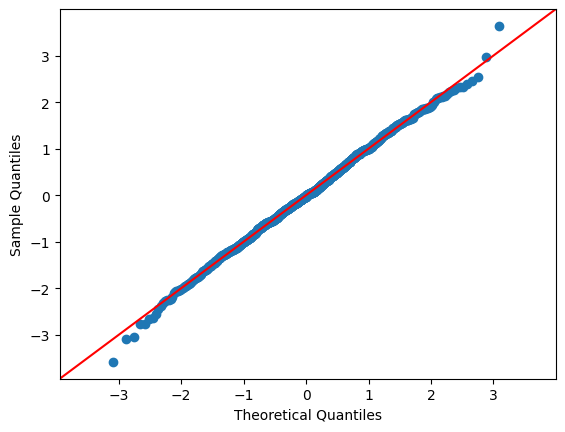

In [13]:
# Нормальное распределение

norm_dist = norm.rvs(size=1000)
fig = qqplot(norm_dist, norm, line='45', fit=True)

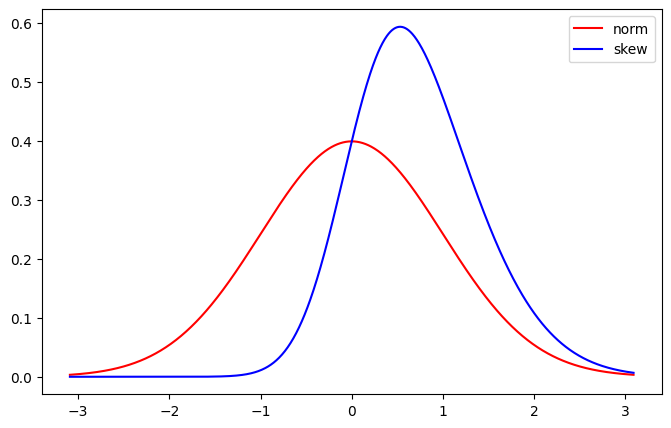

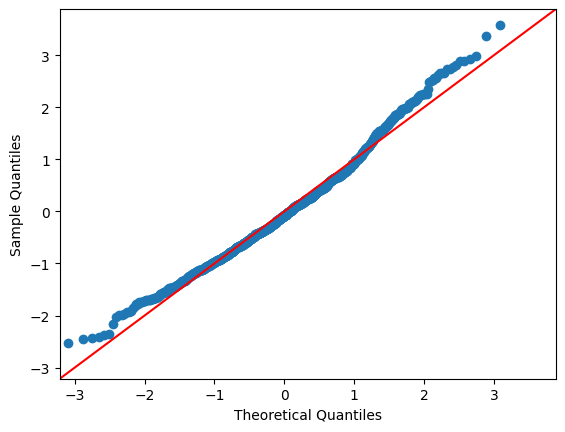

In [14]:
# Нормальное распределение, скошенное вправо
from scipy.stats import skewnorm

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
ax.plot(x, norm.pdf(x), 'r-', label='norm')
ax.plot(x, skewnorm(a=2).pdf(x), 'b-', label='skew')
ax.legend()

fig = qqplot(skewnorm(a=2).rvs(1000), norm, line='45', fit=True)

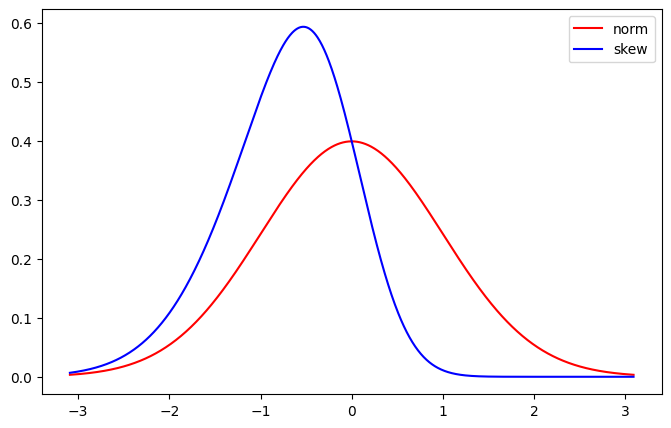

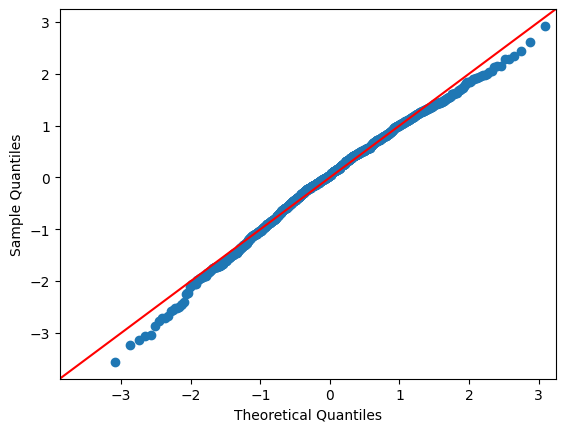

In [15]:
# Нормальное распределение, скошенное влево
from scipy.stats import skewnorm

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
ax.plot(x, norm.pdf(x), 'r-', label='norm')
ax.plot(x, skewnorm(a=-2).pdf(x), 'b-', label='skew')
ax.legend()

fig = qqplot(skewnorm(a=-2).rvs(1000), norm, line='45', fit=True)

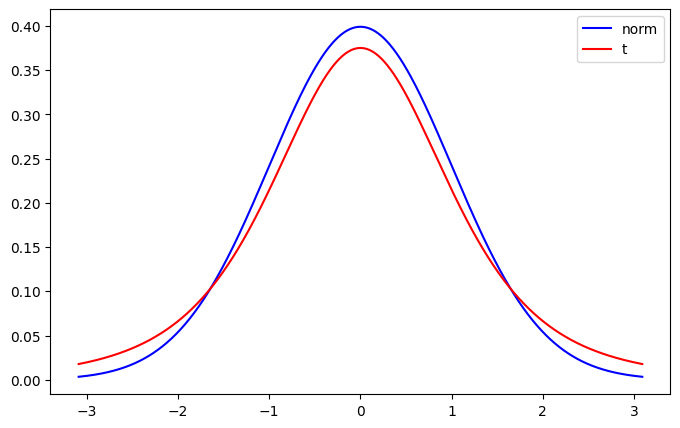

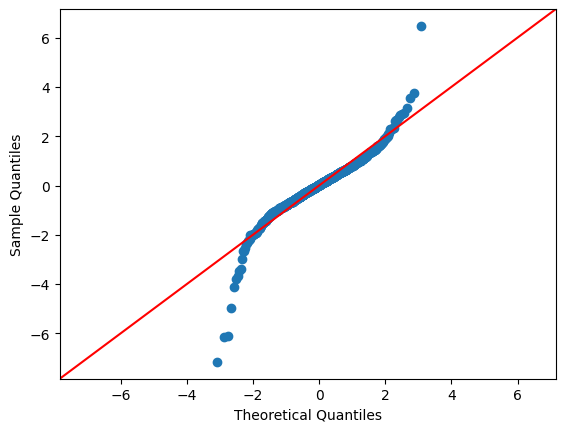

In [16]:
# Распределение Стьюдента, n = 2
from scipy.stats import skewnorm

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
ax.plot(x, norm.pdf(x), 'b-', label='norm')
ax.plot(x, t(4).pdf(x), 'r-', label='t')
ax.legend()

fig = qqplot(t(4).rvs(1000), norm, line='45', fit=True)

Теперь проверим наши данные на нормальность с помошью Q-Q plot.

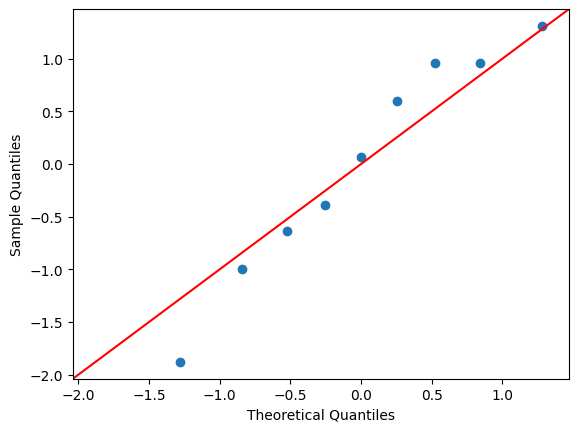

In [17]:
fig = qqplot(np.array(X_1), norm, line='45', fit=True)

Какие выводы можно сделать?

## Раздел 3. Статистические гипотезы с Хи-квадрат

Критерий $\chi^2$ используют в двух случаях:
1. Для расчета согласия эмперического распределения и предполагаемого теоретического. В этом случае проверяется нулевая гипотеза об отсутствии различий между теоретическим и эмперическим распределениями.

2. Для расчета однородности двух независимых экспериментальных выборок. В этом случае проверятеся гипотеза $H_0$ об отсутствии различий между двумя эмпирическими (экспериментальными) распределениями.


Критерий основан на **распределении $\chi^2$**. **Распределении $\chi^2$ с $k$ степенями свободы** — это распределение суммы квадратов $k$ независимых стандартных нормальных случайных величин.

Если
$$Y = \sum\limits_{i=1}^{k} X_i$$ и $$X_i \sim N(0, 1)$$ то $$Y \sim \chi^2_k$$

По выборке параметр $k$ определяется как число элементов в выборке минус 1.

Графики плотности распределения для разных значений $k$.




<img src="https://upload.wikimedia.org/wikipedia/commons/2/21/Chi-square_distributionPDF.png?uselang=ru" width=500>

Исходные данные для $\chi^2$ могут буть представлены в любой шкале, например категориальной. Тогда
решаемый вопрос можно было бы сформулировать так: с одинаковой ли частотой встречаются разные значения признака в эмпирическом и теоретическом распределениях.


Критерий построен так, что при полном совпадении экспериментального и теоретического (или двух экспериментальных) распределений величина $\chi^2_{эмп}$ (хи-квадрат эмпирическое) $=0$, и чем больше расхождение между сопоставляемыми распределениями, тем больше величина значения $\chi^2_{эмп}$.

### Сравнение эмпирического распределения с теоретическим

Давайте разберем классический пример с игральной костью.

Предположим, что исследователю в эксперименте необходимо использовать игральный кубик (шестигранный). Для чистоты эксперимента кубик должен быть "идеальным", т.е. таким, чтобы при достаточно большом числе подбрасываний, каждая грань выпадала бы примерно равное число раз. Задача состоит в выяснении того, будет ли данный кубик близок к идеальному?

Чтобы это проверить, исследователь подбросил кубик 60 раз, при этом количество выпадений каждой грани распределилось следующим образом:





| **Грани кубика**| 1 | 2 | 3 | 4 | 5 | 6 |
|------|------|------|------|------|------|------|
|**Эмпирические частоты** | 12 | 9 | 11 | 14 | 8 | 6 |
|**Теоретические частоты** | 10 | 10 | 10 | 10 | 10 | 10 |

#### Теоретическое задание

Сформулируйте нулевую и альтернативную гипотезы.



Применим критерий $\chi^2$, воспользовавшись функцией [`chisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare)

In [18]:
from scipy.stats import chisquare

chisquare([12, 9, 11, 14, 8, 6])

Power_divergenceResult(statistic=4.2, pvalue=0.5209949534314051)

#### Вопрос

Что можно сказать про результаты теста?

### Сравнение двух экспериментальных распределений

На практике часто встречаются задачи, в которых необходимо сравнивать не теоретическое распределение с эмпирическим, а два и более эмпирических распределения между собой.



Рассмотрим задачу:

Одинаков ли уровень подготовленности учащихся в двух школах, если в первой школе из 100 человек поступило в вуз 82 человека, а во второй школе из 87 поступили 44?

Таблица сопряженности:



|№ школы|школа 1|школа 2|
|------|------|------|
|**Число поступивших**|82|44|
|**Число не поступивших**|18|43|
|**Всего**|100|87|



#### Теоретическое задание:

Сформулируйте нулевую и альтернативную гипотезы.



Применим критерий $\chi^2$, воспользовавшись функцией [`chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency)

In [19]:
from scipy.stats import chi2_contingency

c_table = np.array([[82, 18], [44, 43]])
chi2_contingency(c_table)

Chi2ContingencyResult(statistic=19.498190870249235, pvalue=1.0069500556409318e-05, dof=1, expected_freq=array([[67.37967914, 32.62032086],
       [58.62032086, 28.37967914]]))

#### Вопрос:

Что можно сказать про результаты теста?

## Раздел 4. A/B-тестирования

А теперь поговорим о, пожалуй, самой значимой и важной области применения мат. статистики в бизнесе.



### Идея A/B-тестирования

Основные поинты, которые можно выделить по A/B-тестированию, заключаются в следующем:

- Метод маркетингового исследования
- Набор пользователей разбивается на контрольную и тестовую группы
- В тестовой группе вносится некоторое изменение
- Эффект от изменений оценивается сравнением целевых метрик в
группах


<img src=https://northcreation.agency/assets/Uploads/ab-testing.jpg width="500"/>

### Дизайн эксперимента

Когда вы создаёте свой эксперимент в рамках A/B-тестирования, необходимо придерживаться следующего пайплайна:

- Зафиксировать цели и метрики эксперимента
- Исключить внешние факторы
- Оценить необходимый объем выборки и время проведения
эксперимента
- Собрать данные
- Оценить эффект


Оценка эффекта — последний и крайне важный этап в рамках A/B-тестирований. Наша разница случайна или всё-таки не случайна?

#### Вопрос

Для распределений данных в A/B-тестировании — в какой дисперсии мы заинтересованы: в большой или маленькой?

<img src=https://annalyzin.files.wordpress.com/2017/07/ab-stdev.png width="800"/>

###  Выборочное среднее

Чаще всего в рамках эксперимента нам необходимо работать с каким-либо средним показателем. В связи с этим вспомним понятие выборочного среднего:

- основанное на выборке приближение теоретического среднего для распределения
- дисперсия оценки зависит от числа наблюдений

При этом, если взять три случайные выборки из одной совокупности, они благополучно дают три разные величины среднего и стандартного отклонения.



Таким образом, как связаны дисперсия выборочного среднего и размер выборки?

- в процессе эксперимента получаем N значений
- оцениваем среднее полученных значений
- повторяем эксперимент M раз
- получаем M оценок средних
- дисперсия этих оценок зависит от числа наблюдений в эксперименте

###  Пример задачи

<img src=https://cloud.netlifyusercontent.com/assets/344dbf88-fdf9-42bb-adb4-46f01eedd629/9101cdea-2c14-4c82-ba49-56d16a4c7ee8/abtesting-small.gif width="500"/>

Предположим, что мы хотим провести редизайн сайта интернет-магазина и наша задача оценить какой из макетов наиболее "кликабельный".

Для этого мы будем оценивать показатель CTR (click-through rate) у двух групп пользователей. Первым (группа A) будем показывать старый дизайн, а вторым (группе B) — новый.

В данной задаче мы имеем дело с последовательностью независимых случайных событий: "пользователь кликнул/не кликнул". Совокупность таких событий для $n = 1$ (одного проведенного эксперимента) подчинена распределению Бернулли, а при $n > 1$ — биномиальному распределению, т.е. распределению количества «успехов» в последовательности из n независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна p.

#### Вопрос

А как связано биномиальное распределение и нормальное?

### Связь биномиального распределения с нормальным

<img src=https://slideplayer.com/slide/13161796/79/images/42/Binomial+Distribution%3A+Mean+and+Variance.jpg width="500"/>

In [20]:
from scipy import stats as st

from numpy.random import binomial
from numpy.random import normal

Сгенерируем некоторую выборку данных из исходного биномиального распределения

In [21]:
np.random.seed(2111)

In [22]:
P = 0.1  # convertion rate
N = 20   # sample size

In [23]:
sample = binomial(1, P, N)
print('sample: %s' % sample)
print('mean: %s' % np.mean(sample))

sample: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
mean: 0.05


Оценим параметры имеющегося у нас биномиального распределения

In [24]:
M = 1000  # number of experiments

In [25]:
experiments = binomial(1, P, (M, N))
print('experiemnts shape: %sх%s' % experiments.shape)

experiemnts shape: 1000х20


In [26]:
# оценим среднее для каждого эксперимента
means = np.mean(experiments, axis=1)
means

array([0.  , 0.2 , 0.  , 0.15, 0.05, 0.  , 0.15, 0.05, 0.1 , 0.05, 0.1 ,
       0.  , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.05, 0.15, 0.15, 0.15, 0.1 ,
       0.  , 0.1 , 0.05, 0.15, 0.15, 0.15, 0.1 , 0.1 , 0.25, 0.15, 0.15,
       0.  , 0.15, 0.05, 0.15, 0.1 , 0.  , 0.05, 0.2 , 0.  , 0.1 , 0.05,
       0.1 , 0.1 , 0.15, 0.05, 0.2 , 0.15, 0.  , 0.05, 0.1 , 0.2 , 0.1 ,
       0.1 , 0.1 , 0.15, 0.15, 0.05, 0.1 , 0.1 , 0.1 , 0.2 , 0.15, 0.15,
       0.  , 0.1 , 0.15, 0.  , 0.05, 0.  , 0.2 , 0.05, 0.15, 0.  , 0.05,
       0.2 , 0.15, 0.15, 0.1 , 0.15, 0.05, 0.25, 0.1 , 0.05, 0.15, 0.1 ,
       0.1 , 0.  , 0.05, 0.1 , 0.05, 0.25, 0.05, 0.25, 0.15, 0.2 , 0.05,
       0.05, 0.05, 0.15, 0.1 , 0.15, 0.1 , 0.  , 0.1 , 0.1 , 0.1 , 0.25,
       0.05, 0.1 , 0.2 , 0.1 , 0.1 , 0.2 , 0.05, 0.1 , 0.25, 0.2 , 0.15,
       0.1 , 0.05, 0.05, 0.15, 0.2 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.25, 0.  , 0.  , 0.2 , 0.1 , 0.2 , 0.1 , 0.2 , 0.1 , 0.1 ,
       0.  , 0.2 , 0.15, 0.15, 0.1 , 0.1 , 0.1 , 0.

In [27]:
# оценим дисперсию средних
means_std = np.var(means)
means_std

0.00449639

Оценим зависимость дисперсии от числа наблюдений

In [28]:
# построим график зависимости дисперсии от числа наблюдений
means_stds = []
k = np.arange(20, 2000, 20)
for i in k:
  experiments = binomial(1, P, (i, N))
  means = np.mean(experiments, axis=1)
  means_stds.append(np.var(means))

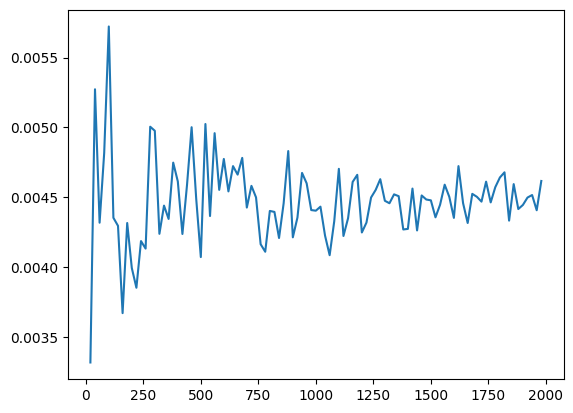

In [30]:
plt.plot(k, means_stds)
plt.show()

#### Вопрос

Какие выводы можно сделать? Уменьшается ли дисперсия?

Итак, теперь у нас есть всё для того, чтобы понять, как осуществляется интересующая нас аппроксимация.

Если n достаточно велико, то в этом случае разумное приближение $\mathrm{Bin} (n, p)$ дается нормальным распределением: $\mathcal{N} (np, \, np (1-p))$ — знакомая нам ИТМЛ.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Binomial_Distribution.svg/1920px-Binomial_Distribution.svg.png width="500"/>

Сравним распределение средних с нормальным

$\mu = p$

$\sigma = \sqrt{\frac{p(1-p)}{n}}$

In [31]:
# https://en.wikipedia.org/wiki/Bernoulli_distribution
mean = P
std = np.sqrt(P * (1 - P) / N)

In [32]:
# сравним распределение с нормальным

normal_distr = normal(loc=P, scale = std, size=N)
print('norm_mean: %.5f' % np.mean(normal_distr), 'bin_mean: %.5f' % mean)
print('norm_std: %.5f' % np.std(normal_distr), 'bin_std: %.5f' % std)

norm_mean: 0.09633 bin_mean: 0.10000
norm_std: 0.09362 bin_std: 0.06708


### Зависимость дисперсии среднего от числа примеров в эксперименте

Центральная предельная теорема — ключевой закон, применяющийся нами в этом месте. Если забыли или не уверены, вспомнить ЦПТ можно, например, [тут](https://en.wikipedia.org/wiki/Central_limit_theorem). Также — хорошее [видео](https://www.youtube.com/watch?v=jvoxEYmQHNM).



<img src=https://i.ibb.co/0ckyS0F/Screenshot-2020-02-27-at-07-59-01.png width="800"/>


Зададим дисперсию в популяции

In [33]:
POPULATION_STD = 10

In [34]:
# Функция генерации данных экспериментов
def gen_expiremnts(mean=0,
                   n_samples=10,
                   n_experiements=500):
    return np.random.normal(loc=mean,
                            scale=POPULATION_STD,
                            size=(n_experiements, n_samples))

In [35]:
gen_expiremnts(mean=0,
                   n_samples=2,
                   n_experiements=4)

array([[-15.08644114,  -5.87072079],
       [ -4.99550659, -14.80458855],
       [  4.4607201 ,   1.18398283],
       [  7.01748529,   7.48721657]])

Проводим 500 экспериментов с разным числом наблюдений

In [36]:
sample_mean_std = []
n_samples = list(range(10, 110, 10))
for n in n_samples:
    data = gen_expiremnts(n_experiements=500, n_samples=n)
    means = np.mean(data, axis=1)         # вычисляем среднее для каждого эксперимента
    sample_mean_std.append(np.std(means)) # сохраняем дисперсию средних

In [37]:
sample_mean_std

[3.2216241860462183,
 2.178551261554272,
 1.914385839571754,
 1.5808959885589748,
 1.4152870253822434,
 1.2735444644527152,
 1.1026110993983116,
 1.0675436703933028,
 1.0030820045361513,
 1.016926553254939]

Вычисляем зависимость дисперсии средних от числа наблюдений по ЦПТ:

In [38]:
sample_mean_std_clt = POPULATION_STD / np.sqrt(n_samples)

Теперь сравниваем с теоретическими значениями по ЦПТ

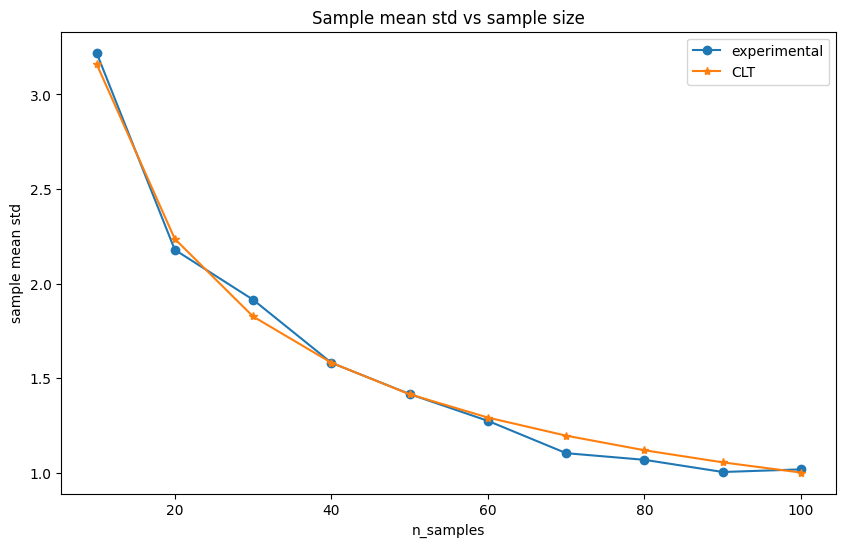

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(n_samples, sample_mean_std, '-o',
         n_samples, sample_mean_std_clt, '-*')
plt.xlabel('n_samples')
plt.ylabel('sample mean std')
plt.legend(['experimental', 'CLT'])
plt.title('Sample mean std vs sample size');

Кажется, работает! :)

### Z-test

Z-test — это еще один очень удобный статистический тест, который применяется для проверки гипотез при использовании ЦПТ. Подробно о нём прочитать можно, например, [тут](https://en.wikipedia.org/wiki/Z-test).

На самом деле, Z-тест — это любой статистический тест, для которого распределение тестовой статистики в соответствии с нулевой гипотезой может быть аппроксимировано нормальным распределением. Из-за центральной предельной теоремы многие тестовые статистические данные как раз и распределяются примерно нормально для больших выборок. Для каждого уровня значимости в доверительном интервале Z-критерий имеет одно критическое значение, что делает его более удобным, чем t-критерий Стьюдента, который имеет отдельные и разные критические значения для каждого размера выборки. Поэтому многие статистические тесты могут быть удобно выполнены как приблизительные Z-тесты, если размер выборки большой.

In [40]:
MEAN_A = 10           # среднее значение в эксперименте A
MEAN_B = 12           # среднее значение в эксперименте B
POPULATION_STD = 10.  # задаем дисперсию в популяции
N_SAMPLES = 250       # число наблюдений в каждом из экспериментов

In [41]:
# Семплируем данные экспериментов
X_a = np.random.normal(loc=MEAN_A,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

X_b = np.random.normal(loc=MEAN_B,
                       scale=POPULATION_STD,
                       size=N_SAMPLES)

X_mean_a = np.mean(X_a)
X_mean_b = np.mean(X_b)

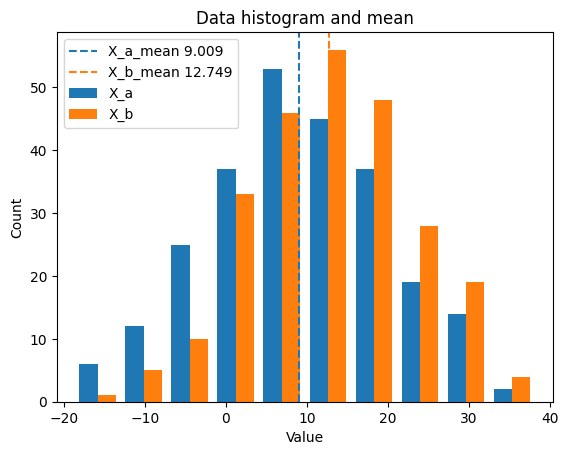

In [42]:
# Визуализируем данные экспериментов
plt.hist([X_a, X_b])
plt.axvline(x=X_mean_a, color='C0', linestyle='--')
plt.axvline(x=X_mean_b, color='C1', linestyle='--')
plt.ylabel('Count')
plt.xlabel('Value')
plt.title('Data histogram and mean')
plt.legend(['X_a_mean %.3f' % X_mean_a,
            'X_b_mean %.3f' % X_mean_b,
            'X_a', 'X_b']);

In [43]:
# Оцениваем стандартную ошибку
se_a = se_b = POPULATION_STD / np.sqrt(N_SAMPLES)
se_ab = np.sqrt(se_a ** 2 + se_b ** 2)  # стандартная ошибка разности

In [44]:
diff = (X_mean_b - X_mean_a)       # разность средних значений двух экспериментов
z = diff / se_ab                   # вычисляем z-статистику
z_quantile = st.norm.cdf(z)        # вычисляем квантиль z-статистики
print('diff=%.2f z=%.2f q=%.2f' % (diff, z, z_quantile))

diff=3.74 z=4.18 q=1.00


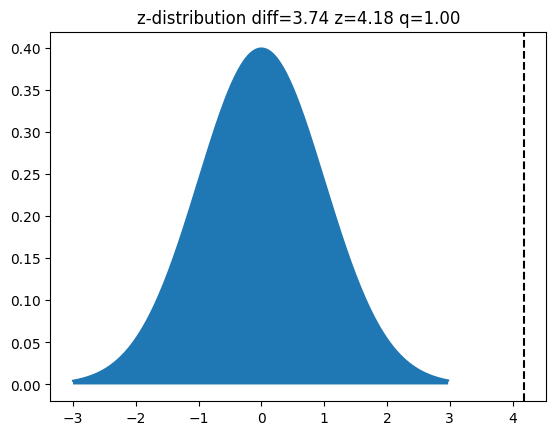

In [45]:
# Визуализируем z-распределение
x = np.arange(-3, 3, 0.025)
plt.plot(x, st.norm.pdf(x))
plt.axvline(z, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x), where=x<z)
plt.title('z-distribution diff=%.2f z=%.2f q=%.2f' % (diff, z, z_quantile));

Что можно сказать о результатах?

### Проведение эксперимента (A/B тест)

Итак, мы готовы к непосредственному проведению эксперимента

Сгенерируем семплы

In [46]:
P1 = 0.1
P2 = 0.11
N1 = 100
N2 = 100

In [47]:
sample1 = binomial(1, P1, N1)
sample2 = binomial(1, P2, N2)

In [48]:
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
diff = mean2 - mean1
print('mean1: %s' % mean1)
print('mean2: %s' % mean2)
print('mean1 - mean2: %s' % diff)

mean1: 0.07
mean2: 0.08
mean1 - mean2: 0.009999999999999995


Оценим выборочное (pooled) среднее и дисперсию

In [49]:
P_pool = (np.sum(sample1 == 1) + np.sum(sample2 == 1)) / (N1 + N2)
std_pool = np.sqrt(P_pool * (1 - P_pool) / (N1 + N2))

In [50]:
confidence = 0.975
z = st.norm.ppf(confidence)
margin = z * std_pool
print('z: %s' % z)

z: 1.959963984540054


Случайно ли различие в средних?

In [51]:
print('margin: %s' % margin)
print('diff: %s' % diff)
print('Are they different (diff > margin)? -> %s' % (abs(diff) > margin))

margin: 0.03650350707025662
diff: 0.009999999999999995
Are they different (diff > margin)? -> False


#### Теоретическое задание:

При каком размере семплов разлиие в 1% будет значимым?

In [ ]:
# your code here